In [1]:
%matplotlib inline

In [ ]:
from galsize_models.measurements import sdss_measurements

In [2]:
from galsize_models.models import load_orphan_subhalos
subhalos = load_orphan_subhalos()
print(subhalos.keys())
littleh = 0.7

['upid', 'mpeak', 'rvir', 'mvir', 'vx', 'vy', 'vz', 'uparent_dist', 'vmax', 'desc_id', 'halo_id', 'vmax_at_mpeak', 'y', 'x', 'z', 'dvmax_rank', 'orphan', 'last_snap', 'last_snap_halo_id', 'has_halotools_match', 'mpeak_scale', 'acc_scale', 'first_acc_scale', 'halfmass_scale', 'has_orphan_hlist_match', 'sm', 'vmax_at_mpeak_percentile', 'zpeak', 'halo_rvir_zpeak']


In [3]:
import os
smf_dirname = "/Users/aphearin/work/UniverseMachine/code/UniverseMachine/obs"
smf_basename = "moustakas_z0.01_z0.20.smf"
smf_fname = os.path.join(smf_dirname, smf_basename)
smf = np.loadtxt(smf_fname)

In [9]:
rbins = np.logspace(-1, 1.35, 25)
rp_bins = np.copy(rbins)
rmids = 10**(0.5*(np.log10(rbins[:-1]) + np.log10(rbins[1:])))
pi_max = 20.


In [4]:
from AbundanceMatching import AbundanceFunction
log10_sm_table = 0.5*(smf[:, 0] + smf[:, 1])
dn_dlog10_sm = smf[:, 2]
af = AbundanceFunction(log10_sm_table, dn_dlog10_sm, (8, 12.5), faint_end_first=True)

from AbundanceMatching import calc_number_densities
Lbox_h0p7 = 250./littleh

scatter = 0.2
remainder = af.deconvolute(scatter, 20)
subhalos['logmstar_scatter'] = af.match(calc_number_densities(subhalos['mpeak'], Lbox_h0p7), 
                    scatter=scatter, do_add_scatter=True, do_rematch=True)

In [18]:
from halotools.mock_observables import return_xyz_formatted_array, tpcf, wp

mask1 = subhalos['logmstar_scatter'] > 9.75
mask2 = subhalos['logmstar_scatter'] > 10.25
mask3 = subhalos['logmstar_scatter'] > 10.75
mask4 = subhalos['logmstar_scatter'] > 11.25

sample1_pos = return_xyz_formatted_array(subhalos['x'], subhalos['y'], 
                                        subhalos['z'], mask=mask1, period=250, 
                                        velocity=subhalos['vz'], 
                                        velocity_distortion_dimension='z')
sample2_pos = return_xyz_formatted_array(subhalos['x'], subhalos['y'], 
                                        subhalos['z'], mask=mask2, period=250, 
                                        velocity=subhalos['vz'], 
                                        velocity_distortion_dimension='z')
sample3_pos = return_xyz_formatted_array(subhalos['x'], subhalos['y'], 
                                        subhalos['z'], mask=mask3, period=250, 
                                        velocity=subhalos['vz'], 
                                        velocity_distortion_dimension='z')
sample4_pos = return_xyz_formatted_array(subhalos['x'], subhalos['y'], 
                                        subhalos['z'], mask=mask4, period=250, 
                                        velocity=subhalos['vz'], 
                                        velocity_distortion_dimension='z')


wp1 = wp(sample1_pos, rp_bins, pi_max, period=250.)
wp2 = wp(sample2_pos, rp_bins, pi_max, period=250.)
wp3 = wp(sample3_pos, rp_bins, pi_max, period=250.)
wp4 = wp(sample4_pos, rp_bins, pi_max, period=250.)

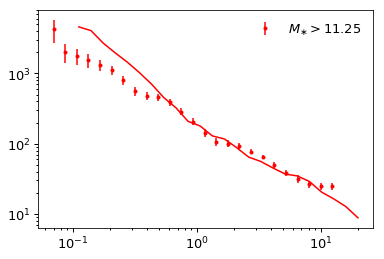

In [20]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

# __=ax.errorbar(sdss_measurements.rp*littleh, 
#                sdss_measurements.wp_sdss_mpajhu_sm9p75*littleh, 
#                sdss_measurements.wperr_sdss_mpajhu_sm9p75*littleh, 
#                fmt='.', color='blue', label=r'$M_{\ast}>9.75$')
# __=ax.plot(rmids, wp1, color='blue')


# __=ax.errorbar(sdss_measurements.rp*littleh, 
#                sdss_measurements.wp_sdss_mpajhu_sm10p25*littleh, 
#                sdss_measurements.wperr_sdss_mpajhu_sm10p25*littleh, 
#                fmt='.', color='green', label=r'$M_{\ast}>10.25$')
# __=ax.plot(rmids, wp2, color='green')


# __=ax.errorbar(sdss_measurements.rp*littleh, 
#                sdss_measurements.wp_sdss_mpajhu_sm10p75*littleh, 
#                sdss_measurements.wperr_sdss_mpajhu_sm10p75*littleh, 
#                fmt='.', color='orange', label=r'$M_{\ast}>10.75$')
# __=ax.plot(rmids, wp3, color='orange')

__=ax.errorbar(sdss_measurements.rp*littleh, 
               sdss_measurements.wp_sdss_mpajhu_sm11p25*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_sm11p25*littleh, 
               fmt='.', color='red', label=r'$M_{\ast}>11.25$')
__=ax.plot(rmids, wp4, color='red')

legend = ax.legend()

In [21]:
print(subhalos.keys())

['upid', 'mpeak', 'rvir', 'mvir', 'vx', 'vy', 'vz', 'uparent_dist', 'vmax', 'desc_id', 'halo_id', 'vmax_at_mpeak', 'y', 'x', 'z', 'dvmax_rank', 'orphan', 'last_snap', 'last_snap_halo_id', 'has_halotools_match', 'mpeak_scale', 'acc_scale', 'first_acc_scale', 'halfmass_scale', 'has_orphan_hlist_match', 'sm', 'vmax_at_mpeak_percentile', 'zpeak', 'halo_rvir_zpeak', 'logmstar_scatter']
